In [7]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
!pip install keras
import keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
!unzip -o -q celeba-dataset_26015.zip

In [10]:
# Importing the Keras libraries and packages
!pip install pandas
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

You should consider upgrading via the 'pip install --upgrade pip' command.


Found 21014 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.


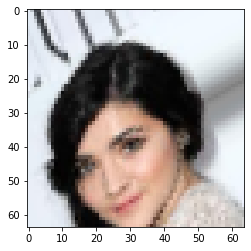

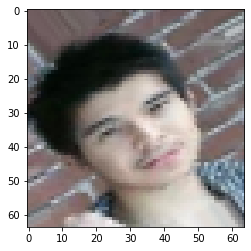

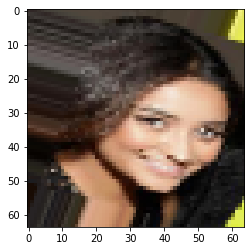

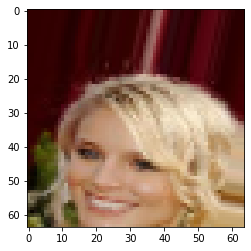

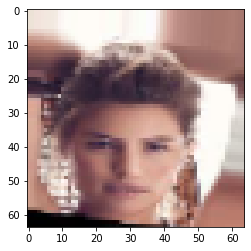

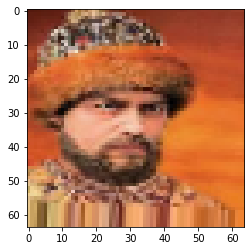

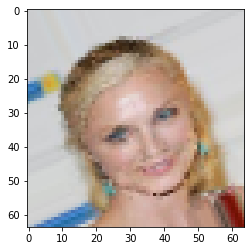

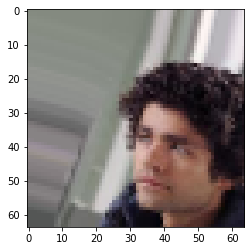

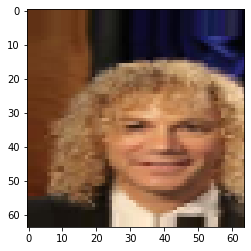

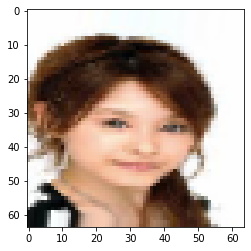

In [13]:
# Read document
dt=pd.read_csv('celeba-dataset(26015)/list_attr_celeba.csv').replace(to_replace=-1, value=0, inplace=True)
# Read Images from Folders      
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen = ImageDataGenerator( ##data augmentation and dropout
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

training_set = train_datagen.flow_from_directory('celeba-dataset(26015)/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                )

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('celeba-dataset(26015)/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            )   
from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [14]:
#! Here We Create the CNN
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

# Droup out
# classifier.add(Droupout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [15]:
#Fitting the CNN to the images
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 20000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 5001)

# save model to single file
classifier.save("CNN_MoF.hdf5") # Hierarchical Data Format Fifth Version
print("Saved model to disk")

# save training history to another file
import pickle 
filehandler = open('history.pkl', 'wb') 
pickle.dump(history, filehandler)

Epoch 1/5
20000/20000 [==============================] - 1718s 86ms/step - loss: 0.2585 - accuracy: 0.8862 - val_loss: 0.0829 - val_accuracy: 0.9384
Epoch 2/5
20000/20000 [==============================] - 1715s 86ms/step - loss: 0.1634 - accuracy: 0.9334 - val_loss: 0.0428 - val_accuracy: 0.9466
Epoch 3/5
20000/20000 [==============================] - 1732s 87ms/step - loss: 0.1442 - accuracy: 0.9418 - val_loss: 0.1693 - val_accuracy: 0.9534
Epoch 4/5
20000/20000 [==============================] - 1715s 86ms/step - loss: 0.1332 - accuracy: 0.9466 - val_loss: 0.0153 - val_accuracy: 0.9390
Epoch 5/5
20000/20000 [==============================] - 1718s 86ms/step - loss: 0.1269 - accuracy: 0.9494 - val_loss: 0.1258 - val_accuracy: 0.9571
Saved model to disk


In [16]:
from keras.models import load_model
classifier=load_model('CNN_MoF.hdf5')


In [17]:
test_set.reset()
y_pred = classifier.predict_generator(test_set)
y_test = test_set.classes[test_set.index_array]
y_pred = ((y_pred>0.5)*1.0).flatten()  # Set the threshold to be 0.5


# Confusion Matrix
!pip install sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
print(cm)
print("Prediction Accuracy is",((cm[0,0]+cm[1,1])/sum (sum(cm)))) 
print("Recall-rate is: ",(cm[1,1]/(cm[1,1]+cm[1,0])))


[[2728  130]
 [  85 2058]]
Prediction Accuracy is 0.9570085982803439
Recall-rate is:  0.9603359776014933


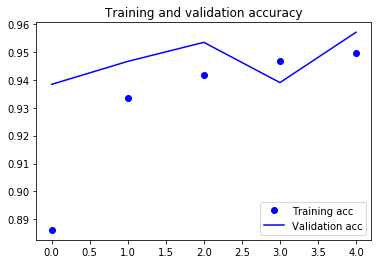

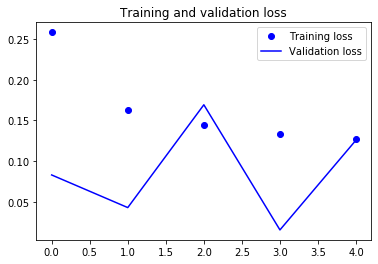

In [19]:
import pickle
with open('history.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
## Vgg16
from keras.applications.vgg16 import VGG16
# Initialising the CNN
classifier_v = Sequential()         
         
# load model
model_v = VGG16(include_top=False, input_shape=(64, 64, 3))

# mark loaded layers as not trainable !Don't change the weights in VGG16
for layer in model_v.layers:
    layer.trainable = False

# Add VGG16 into your CNN
classifier_v.add(model_v)

# Step 6 - Flattening
classifier_v.add(Flatten())

""" New Layer Dropout """
#classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier_v.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier_v.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier_v.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier_v.summary()

classifier_v.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 14,977,089
Trainable params: 262,401
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
# checkpoint
from keras.callbacks import ModelCheckpoint
filepath="VGG16-Model-{epoch:02d}-{val_accuracy:.2f}.html"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

history_vgg16 = classifier_v.fit_generator(training_set,
      steps_per_epoch=20000,
      epochs=5,
      validation_data=test_set,
      validation_steps=5000,
      callbacks=[checkpoint])

Epoch 1/5
20000/20000 [==============================] - 898s 45ms/step - loss: 0.1120 - accuracy: 0.9554 - val_loss: 1.4462 - val_accuracy: 0.8712

Epoch 00001: saving model to VGG16-Model-01-0.87.html
Epoch 2/5
20000/20000 [==============================] - 899s 45ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 1.0255 - val_accuracy: 0.8748

Epoch 00002: saving model to VGG16-Model-02-0.87.html
Epoch 3/5
20000/20000 [==============================] - 899s 45ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.5617 - val_accuracy: 0.8711

Epoch 00003: saving model to VGG16-Model-03-0.87.html
Epoch 4/5
20000/20000 [==============================] - 898s 45ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.5889 - val_accuracy: 0.8727

Epoch 00004: saving model to VGG16-Model-04-0.87.html
Epoch 5/5
20000/20000 [==============================] - 898s 45ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0914 - val_accuracy: 0.8702

Epoch 00005: saving model to VGG16-Mode

In [35]:
#Save the Model
classifier_v.save('MoF.hdf5')
#save training history
filehandler=open('history_vgg16.pkl','wb')

In [22]:
#load model
from keras.models import load_model
classifier_v = load_model('MoF.hdf5')


In [23]:
test_set.reset()
y_pred_v = classifier_v.predict_generator(test_set)
y_test_v = test_set.classes[test_set.index_array]
y_pred_v = ((y_pred_v>0.5)*1.0).flatten()  # Set the threshold to be 0.5


# Confusion Matrix
!pip install sklearn
from sklearn.metrics import confusion_matrix
cm_v = confusion_matrix(y_test_v, y_pred_v)


You should consider upgrading via the 'pip install --upgrade pip' command.


In [24]:
print(cm_v)
print("Prediction Accuracy is",((cm_v[0,0]+cm_v[1,1])/sum (sum(cm_v)))) 
print("Recall-rate is: ",(cm_v[1,1]/(cm_v[1,1]+cm_v[1,0])))


[[2533  325]
 [ 318 1825]]
Prediction Accuracy is 0.8714257148570286
Recall-rate is:  0.8516098926738217


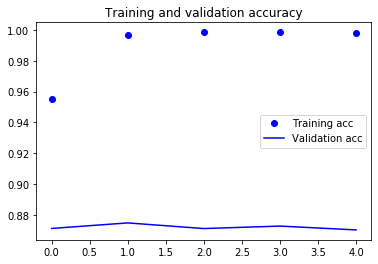

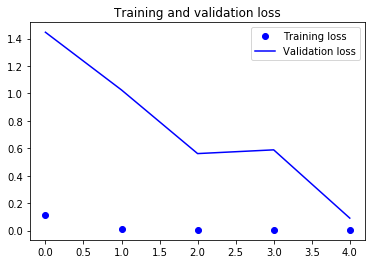

In [37]:
import pickle
#with open('history_vgg16.pkl', 'rb') as pickle_file:
#    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
